In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ev-cars-available-in-india-till-oct2021/EV_CARS _INDIA.csv


## Data reading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/ev-cars-available-in-india-till-oct2021/EV_CARS _INDIA.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df.head()

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.4,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.4,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.0,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.2,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.0,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14


## DATA PREPROCESSING

In [4]:
df.describe()

,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),No. of Seats,Charging T(h),Price(Lh)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,56.634545,6.909091,165.090909,363.454545,212.181818,445.818182,4.909091,10.363636,74.272727
std,33.683686,2.653848,58.430223,139.407578,182.454826,280.207001,0.301511,3.931227,72.468049
min,10.080000,3.300000,80.000000,100.000000,19.000000,70.000000,4.000000,7.000000,9.000000
25%,28.100000,4.950000,120.000000,309.000000,75.500000,207.500000,5.000000,8.500000,15.500000
50%,44.500000,5.700000,180.000000,414.000000,107.000000,395.000000,5.000000,9.000000,25.000000
75%,91.700000,9.100000,200.000000,475.000000,302.000000,680.000000,5.000000,10.500000,117.500000
max,95.000000,11.200000,250.000000,500.000000,523.000000,830.000000,5.000000,21.000000,204.000000


Above we have shown the various details of dataset regarding no. of rows, mean value , Standard Deviation, minimum etc.

In [5]:
len(df)

11

In [6]:
df


,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.40,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.40,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.00,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.20,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.00,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14
5,Hyudai Kona Electric,39.20,9.7,155,452,103,395,Automatic,5,7,Yes,FWD,24
6,Jaguar I-Pace,90.00,4.8,200,470,294,696,Automatic,5,13,Yes,AWD,112
7,Mahindra eVerito,21.20,11.2,86,140,33,91,Automatic,5,12,Yes,FWD,10
8,MG ZS EV,44.50,8.5,120,340,107,353,Automatic,5,8,Yes,FWD,25
9,Mercedes Benz EQC,80.00,5.1,180,414,304,760,Automatic,5,21,Yes,AWD,100


Now we will check for any value is null or not


In [7]:
df.isnull().sum()

Brand Name               0
Battery Capacity(kWh)    0
Acceleration(sec)        0
TopSpeed(km/h)           0
Range(km)                0
Max Power(kW)            0
Max Torque(Nm)           0
Transmission             0
No. of Seats             0
Charging T(h)            0
No. of Airbags           0
Drive Type               0
Price(Lh)                0
dtype: int64

In [8]:
df.columns


Index(['Brand Name', 'Battery Capacity(kWh)', 'Acceleration(sec)',
       'TopSpeed(km/h)', 'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)',
       'Transmission', 'No. of Seats', 'Charging T(h)', 'No. of Airbags',
       'Drive Type', 'Price(Lh)'],
      dtype='object')

In [9]:
df.shape

(11, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand Name             11 non-null     object 
 1   Battery Capacity(kWh)  11 non-null     float64
 2   Acceleration(sec)      11 non-null     float64
 3   TopSpeed(km/h)         11 non-null     int64  
 4   Range(km)              11 non-null     int64  
 5   Max Power(kW)          11 non-null     int64  
 6   Max Torque(Nm)         11 non-null     int64  
 7   Transmission           11 non-null     object 
 8   No. of Seats           11 non-null     int64  
 9   Charging T(h)          11 non-null     int64  
 10  No. of Airbags         11 non-null     object 
 11  Drive Type             11 non-null     object 
 12  Price(Lh)              11 non-null     int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.2+ KB


In [11]:
df["Brand Name"].unique()

array(['Audi RS e-tron GT ', 'Audi e-tron GT ', 'Audi e-tron ',
       'Tata Nexon EV', 'Tata Tigor EV', 'Hyudai Kona Electric',
       'Jaguar I-Pace', 'Mahindra eVerito', 'MG ZS EV',
       'Mercedes Benz EQC', 'Mahindra e2op4/p6'], dtype=object)

In [12]:
df["Battery Capacity(kWh)"].unique()

array([93.4 , 95.  , 30.2 , 26.  , 39.2 , 90.  , 21.2 , 44.5 , 80.  ,
       10.08])

In [13]:
df["Acceleration(sec)"].unique()

array([ 3.3,  4.1,  5.7,  9.9,  9.7,  4.8, 11.2,  8.5,  5.1,  8. ])

## DATA VISUALIZATION

Now we will plot the bar graph between count of the items with the other features

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/si

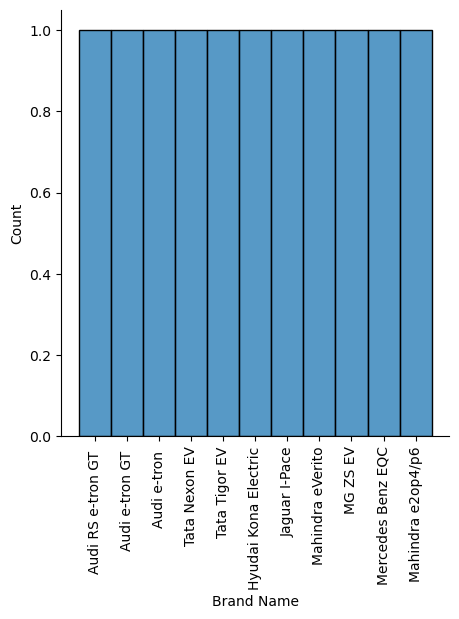

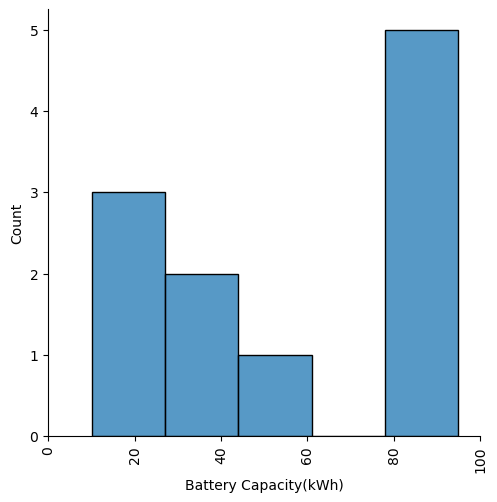

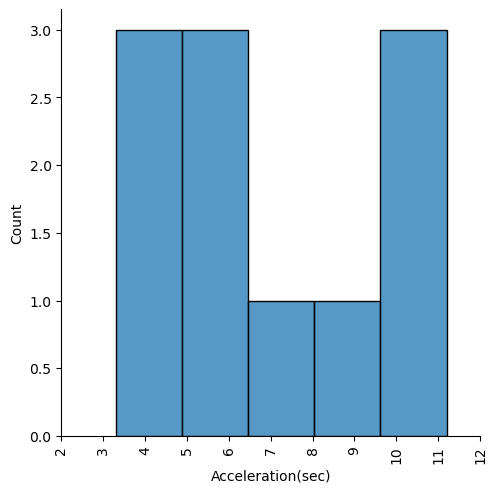

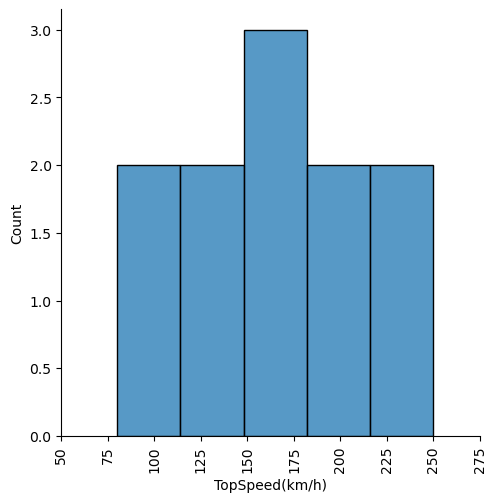

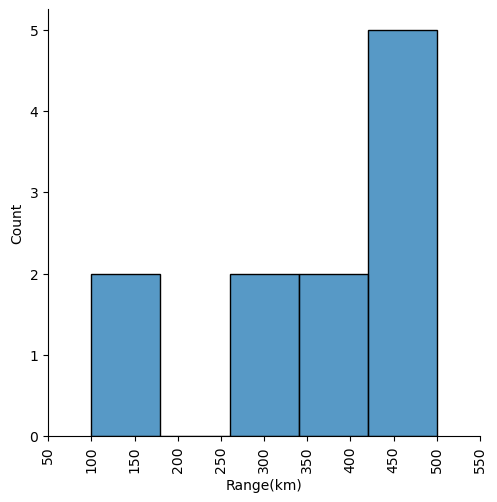

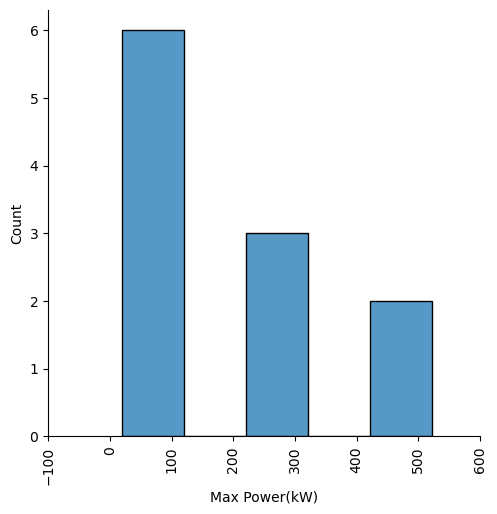

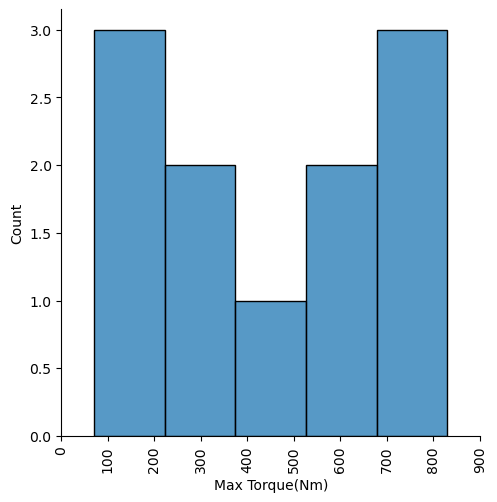

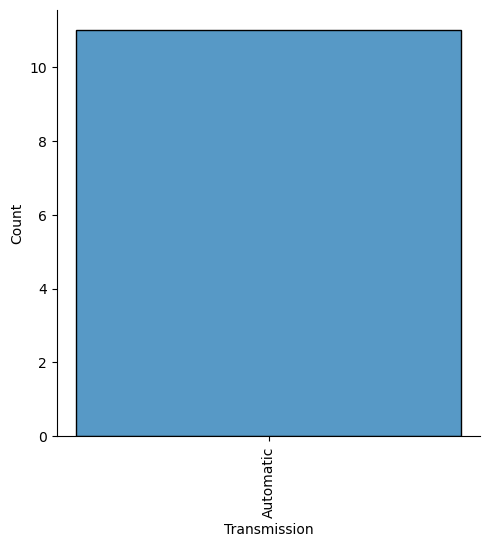

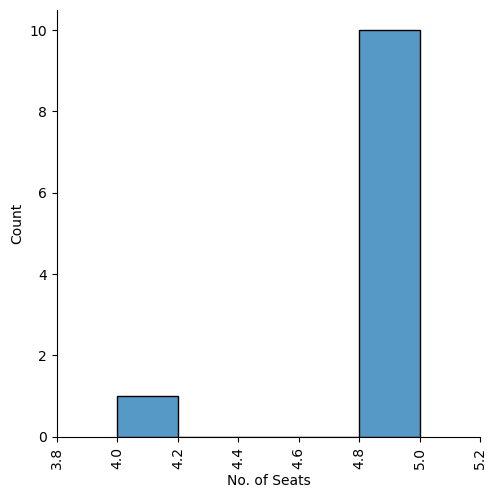

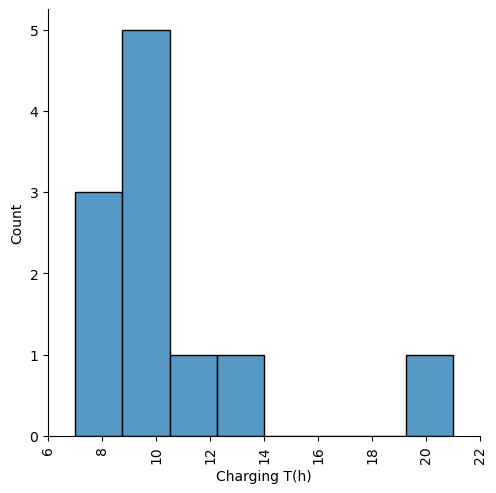

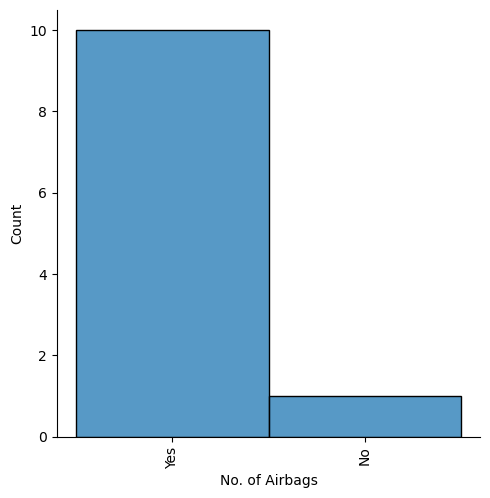

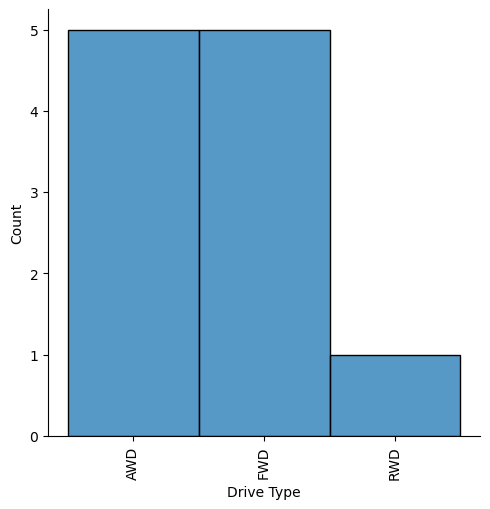

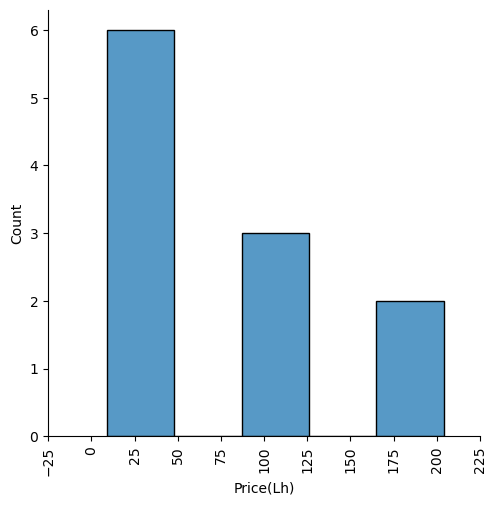

In [14]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)

Iformation retrieved from above Histogram:
1. Count Vs Battery Capacity : out of 11 models 5 models have higher battery capacity from which we can derive that higher battery capacity vehicles is prefered.
2. Count Vs Top Speed: The highest count is of 3 for speed 150-175km/hr. From here we can conclude that an average speed is preferred not very high not very low while manufacturing any model
3. Count Vs Max Power: Out of 11, six car model had power between range of 10 to 100. This shows that not very high power models are used till ovtober 2023 in India.
4. Count Vs Charging: Here also we can see that most of the models preffered lower charging 
5. Count Vs No. of Seats: Most of the cars have 5 seater which means 5 seaters cars have more demand in the market  ratgher than 4 or less.
6. Count Vs Air Bags: out of 11, 10 models have air bags. This also shows that most of the companies also gives higher priority to security of customer
7. Count Vs Drive Type: Both AWD(All Wheel Drive) and FWD(Forward Wheel Drive) have higher priority than RWD(Rear Wheel Drive). This shows that AWD or RWD vehicles will have higher demand
8. Count Vs Price: Out of 11, 6 car models have lower price as compare to others. So we can say that Cheap cars with best features is preferredn in India.

In [15]:
df.columns


Index(['Brand Name', 'Battery Capacity(kWh)', 'Acceleration(sec)',
       'TopSpeed(km/h)', 'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)',
       'Transmission', 'No. of Seats', 'Charging T(h)', 'No. of Airbags',
       'Drive Type', 'Price(Lh)'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

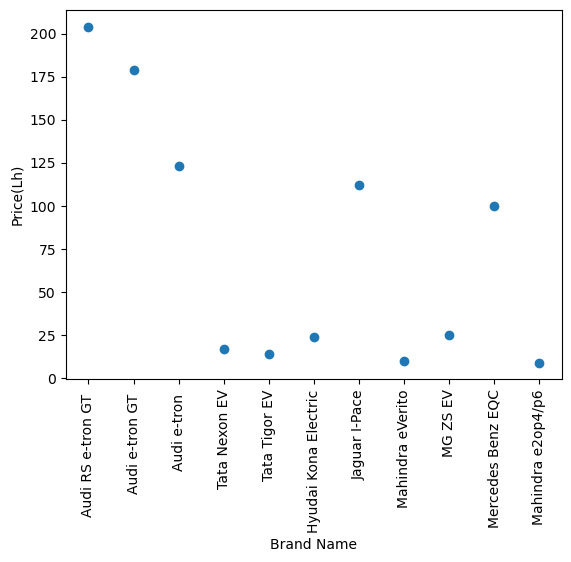

In [16]:
plt.xlabel('Brand Name')
plt.ylabel('Price(Lh)')
plt.scatter(df['Brand Name'],df['Price(Lh)'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

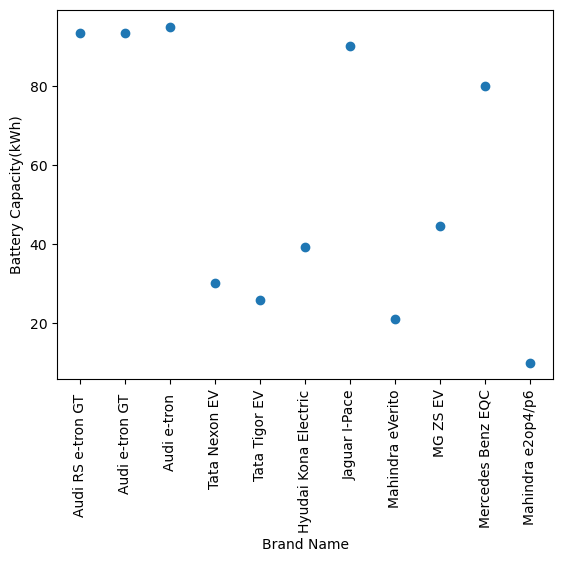

In [17]:
plt.xlabel('Brand Name')
plt.ylabel('Battery Capacity(kWh)')
plt.scatter(df['Brand Name'],df['Battery Capacity(kWh)'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

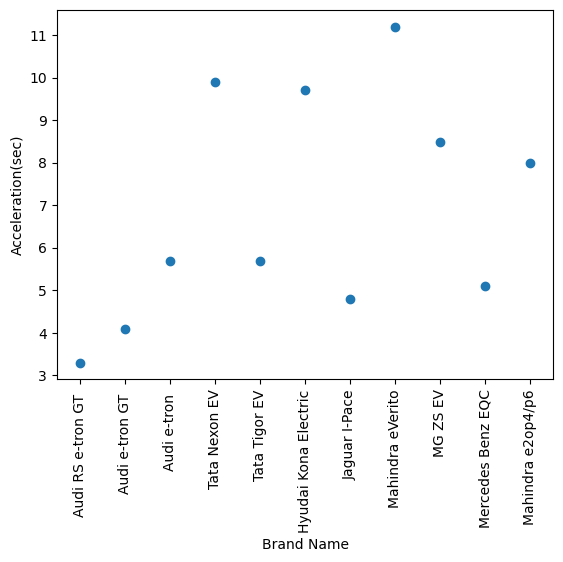

In [18]:
plt.xlabel('Brand Name')
plt.ylabel('Acceleration(sec)')
plt.scatter(df['Brand Name'],df['Acceleration(sec)'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

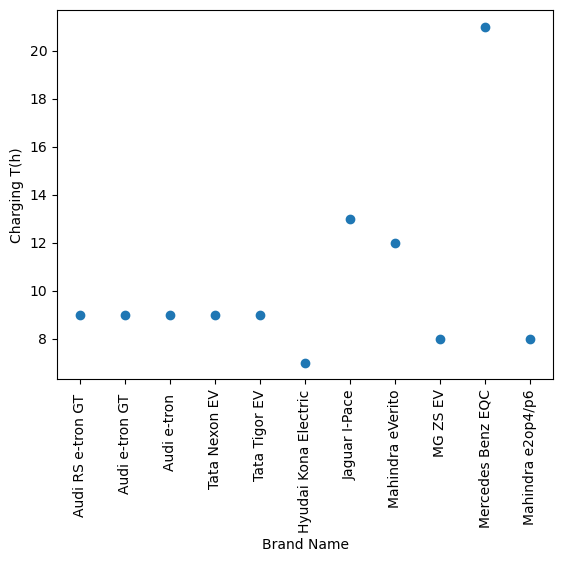

In [19]:
plt.xlabel('Brand Name')
plt.ylabel('Charging T(h)')
plt.scatter(df['Brand Name'],df['Charging T(h)'])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

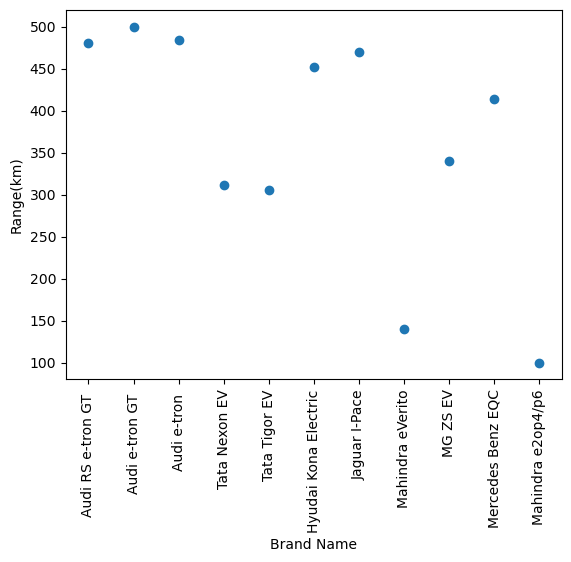

In [20]:
plt.xlabel('Brand Name')
plt.ylabel('Range(km)')
plt.scatter(df['Brand Name'],df['Range(km)'])
plt.xticks(rotation=90)

In [21]:
# .By the above plots we can say that the Brand Jaguar I-Pace will give better result regarding the 
# with minimal price and other added features as average....

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


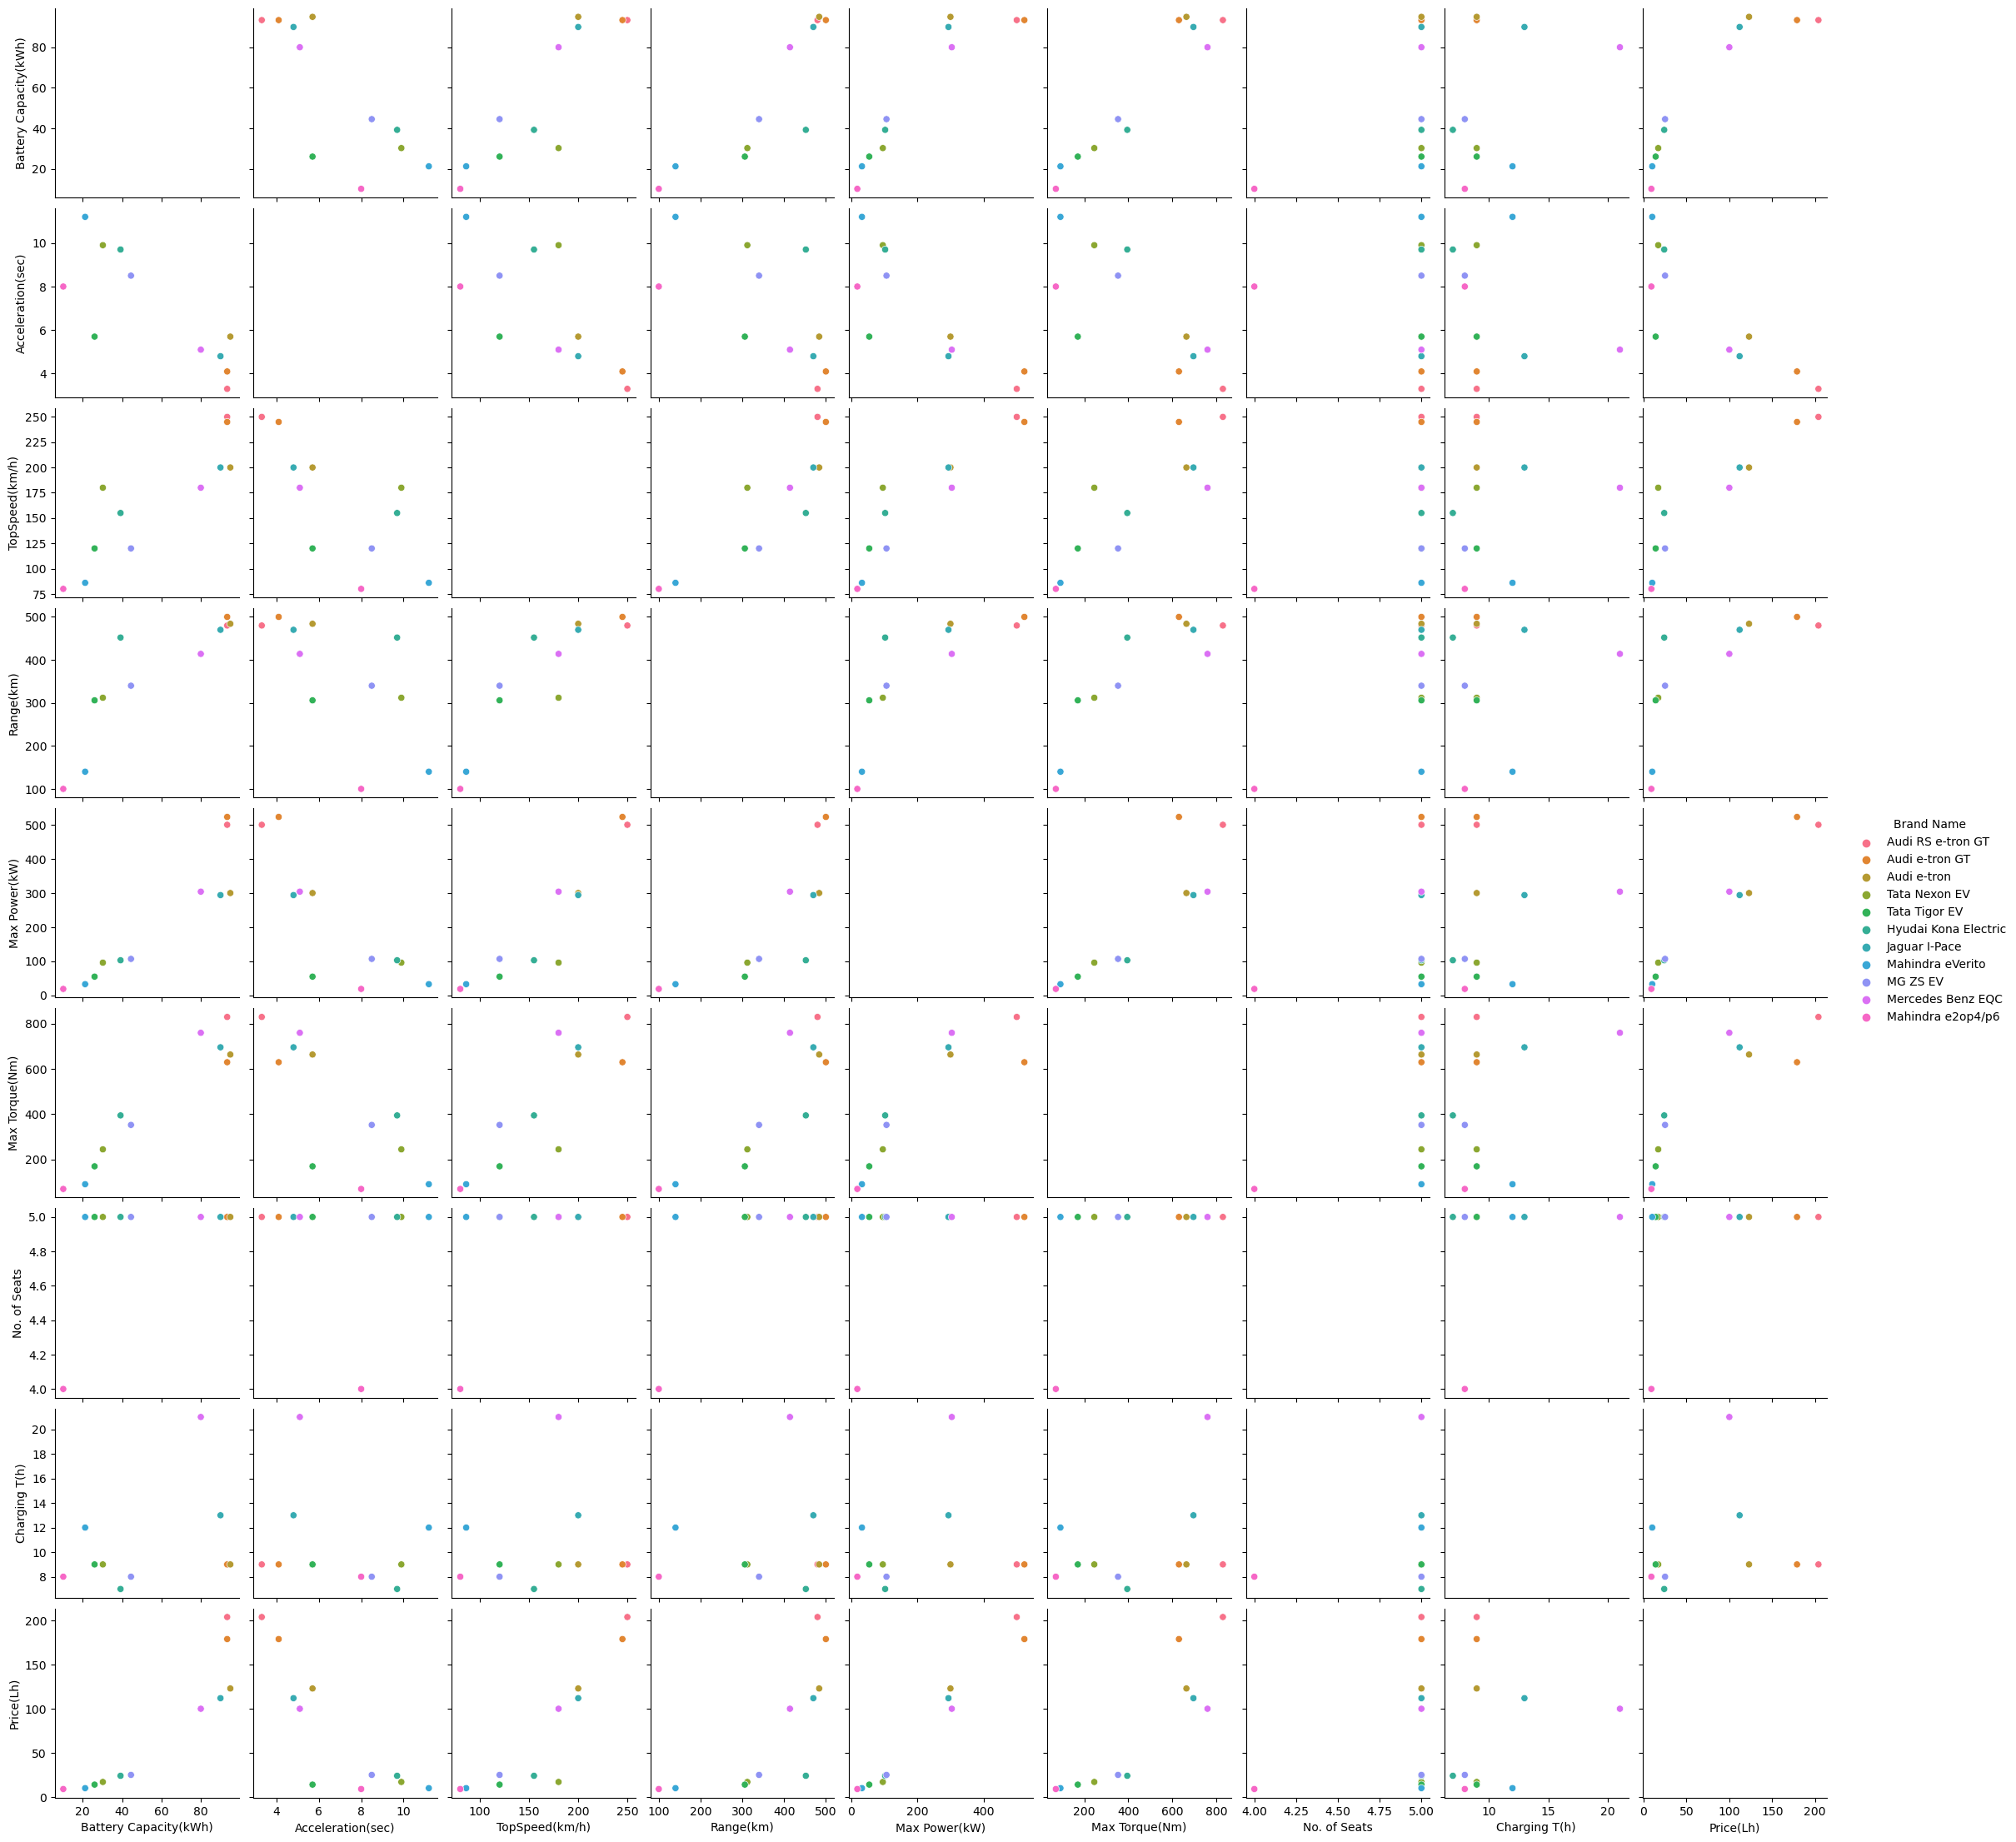

In [22]:
sns.pairplot(df,hue='Brand Name')

/tmp/ipykernel_32/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

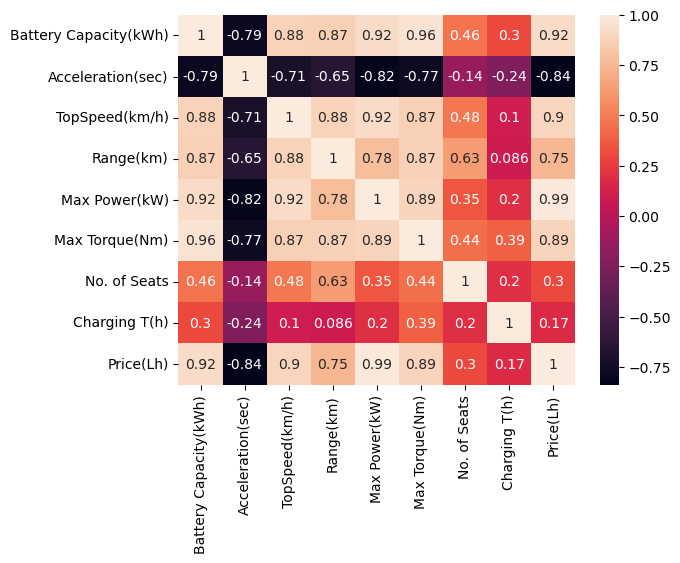

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
# By the above heatmap we can say that acceleration is inversely proportional to other characteristics
# As well as top speed and max power are highly correlated
# so we can avoid this feature to reduce the correlation
# Similarly we can see that max power and price is also highly correlated

In [25]:
df.iloc[6]

Brand Name               Jaguar I-Pace
Battery Capacity(kWh)             90.0
Acceleration(sec)                  4.8
TopSpeed(km/h)                     200
Range(km)                          470
Max Power(kW)                      294
Max Torque(Nm)                     696
Transmission                 Automatic
No. of Seats                         5
Charging T(h)                       13
No. of Airbags                     Yes
Drive Type                         AWD
Price(Lh)                          112
Name: 6, dtype: object

In [26]:
df['Price(Lh)']

0     204
1     179
2     123
3      17
4      14
5      24
6     112
7      10
8      25
9     100
10      9
Name: Price(Lh), dtype: int64

In [27]:
df.iloc[9]

Brand Name               Mercedes Benz EQC
Battery Capacity(kWh)                 80.0
Acceleration(sec)                      5.1
TopSpeed(km/h)                         180
Range(km)                              414
Max Power(kW)                          304
Max Torque(Nm)                         760
Transmission                     Automatic
No. of Seats                             5
Charging T(h)                           21
No. of Airbags                         Yes
Drive Type                             AWD
Price(Lh)                              100
Name: 9, dtype: object

## Conclusion

From the Above visualization we can clearly observe that most of the Car models till OCT 2023, are cheaper as compared to high powered EV vehicles which are more costilier. Next thing we have observed that security measures are must i.e out of all samples except one, all are having Air Bag support. Next Thing which we have obsered that 5 seater vehicles are much prefered in the industry of EV vehicles.
FWD and AWD is more preferred over RWD.
Seeing the heat map we can see that max power, speed and price are highly correrelated which shows that in order to achive higher power or speed we need to spend more money. 
Then to most of the models are cheaper ie (0-50Lh), which shows that Indian people prefer EV vehicles with not high fetures, but moderate, in resonable price. 
Since India is developing country we can assume that it might be a reason for the demand of cheaper vehicles.
So EV vehicle with low price, 5 seater, air bags availability, moderate power and charging will have higher chance of sale in INDIA.